In [1]:
from __future__ import print_function
from sklearn import preprocessing,tree
import pandas as pd
import numpy as np
import graphviz

In [2]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [3]:
#Preprocessing
training_data = pd.read_csv("cancer.csv",sep=",")
print("Total samples : ",len(training_data))
print("Partial data\n", training_data.head())
train_data, targets = encode_target(training_data,"risks")
print("* train_data.head()", train_data[["Target", "risks"]].head(),
      sep="\n", end="\n\n")
print("* train_data.tail()", train_data[["Target", "risks"]].tail(),
      sep="\n", end="\n\n")
print("* targets", targets, sep="\n", end="\n\n")
features = list(train_data.columns[:5])
print("* features:", features, sep="\n")

Total samples :  27
Partial data
   sex  age prior_diag  heredity smoking risks
0   F   20     normal     False      No     N
1   F   40     normal     False      No     N
2   F   60     normal     False      No     P
3   F   20     cancer     False      No     P
4   F   40     cancer     False      No     P
* train_data.head()
   Target risks
0       0     N
1       0     N
2       1     P
3       1     P
4       1     P

* train_data.tail()
    Target risks
22       0     N
23       0     N
24       0     N
25       0     N
26       0     N

* targets
['N' 'P']

* features:
['sex', 'age', 'prior_diag', 'heredity', 'smoking']


In [4]:
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

# Fit the encoder to the pandas column
for column in train_data.columns:
    if train_data[column].dtype == type(object):
        train_data[column] = le.fit_transform(train_data[column])

## Create DecisionTreeClassifier and train it on our training dataset
y = train_data["Target"]
X = train_data[features]
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
#Modeling 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Cancer Breast") 

'Cancer Breast.pdf'

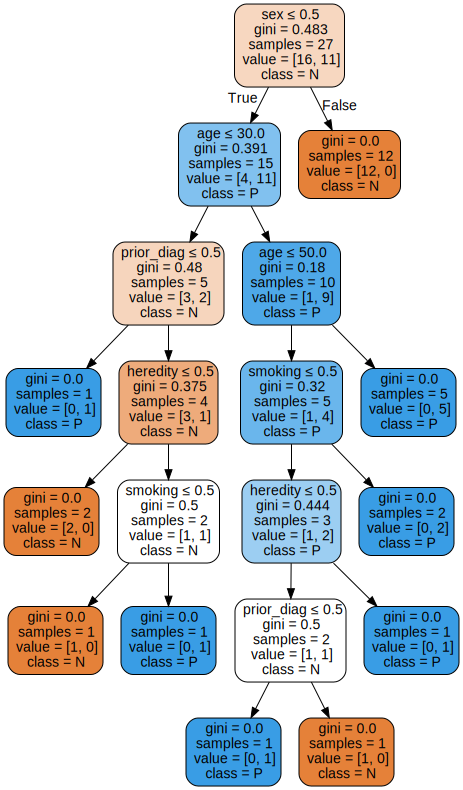

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         class_names=targets,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("Cancer Breast")
graph